Q_Learning for Policy IV

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def reset1():
    st= [0]*16
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
fi = [[0,2],[2,7],[2,4],[6,5],[3,1]]

In [5]:
fi

[[0, 2], [2, 7], [2, 4], [6, 5], [3, 1]]

In [6]:
1 in fi[4]

True

In [7]:
fi[4][0]

3

In [8]:
def member(i , fi):
    mem=[]
    if i in fi[0]:
        if i !=fi[0][0]:
            mem.append(fi[0][0])
        if i !=fi[0][1]:
            mem.append(fi[0][1])
        
    if i in fi[1]:
        if i !=fi[1][0]:
            mem.append(fi[1][0])
        if i !=fi[1][1]:
            mem.append(fi[1][1])
        
    if i in fi[2]:
        if i !=fi[2][0]:
            mem.append(fi[2][0])
        if i !=fi[2][1]:
            mem.append(fi[2][1])
    
    if i in fi[3]:
        if i !=fi[3][0]:
            mem.append(fi[3][0])
        if i !=fi[3][1]:
            mem.append(fi[3][1])
    
    if i in fi[4]:
        if i !=fi[4][0]:
            mem.append(fi[4][0])
        if i !=fi[4][1]:
            mem.append(fi[4][1])
    
    return mem
    

In [9]:
member(1,fi)

[3]

In [10]:
tpi =0
for i in range(len(member(1,fi))):
    tpi+=tp[member(1,fi)[i]] 
print(tpi)

0.857


In [11]:
sum((tpi,tp[1]))

6.277

In [12]:
len(member(2,fi))

3

In [13]:
def step (action ,st , i ):
    f = random.weibullvariate(weibull_scale[i],weibull_shape[i])
    
    if action == 0 :
        st[i] +=5 #age 
        
        if f <= st[i]:
            st[i+8]=1    
        else:
            st[i+8]=0 
    
    if action ==1 :
            st[i]=0
            st[i+8]=0
            
            for j in range(len(member(i,fi))):
                st[member(i,fi)[j]] = 0 
                st[member(i,fi)[j]+8] = 0 
            
           
    return tuple(st)
                 

In [14]:
step(1,list((500,5,2,5,8,41,2,8,85,42,1,25,14,35,12,24,0)),0)

(0, 5, 0, 5, 8, 41, 2, 8, 0, 42, 0, 25, 14, 35, 12, 24, 0)

In [15]:
def rewardfun (action,st,i):
    reward =[]
    
    if action == 1 :
        tpi = 0 
        for j in range(len(member(i,fi))):
            tpi+=tp[member(i,fi)[j]]
        
        reward = - (time_interval/(0.8*time_interval*sum((tpi,tp[i]))))*0.8*sum((tpi,tp[i]))
    
    if (st[i+8]==1 and action == 0):
        tpi = 0 
        for j in range(len(member(i,fi))):
            tpi+=tp[member(i,fi)[j]]
            
        tfi = 0
        for j in range(len(member(i,fi))):
            tfi+=tf[member(i,fi)[j]]
            
        reward = - (time_interval/(0.8*time_interval*sum((tpi,tp[i]))))*time_interval*math.ceil(0.8*sum((tfi,tf[i]))/time_interval)
            
    if (st[i+8]==0 and action == 0):
        
        reward = 5 
        
    return reward
    
            
    

In [16]:
rewardfun(0,(500,5,2,5,8,41,2,8,0,42,1,25,14,35,12,24,0),0)

5

In [17]:
def choose_action(epsilon, state,i):
    if (state[1]==1): # we had failur in component i
        return 1
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1]) 
        else:
            return np.argmax(Q_table[state])
            

In [18]:
Q_table = np.zeros((100000 ,2) + (2,))
state = (500,5,2,5,8,41,2,8,0,42,10,25,14,35,12,24,0)
state1 = [state[2],state[10]]


In [19]:
choose_action(0.5, state1,2)

0

In [20]:
num_episodes=1000
min_lr=0.1 
min_epsilon=0.1
discount=0.9
decay=25

In [21]:
def get_learning_rate( t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


Tire

In [22]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=0
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

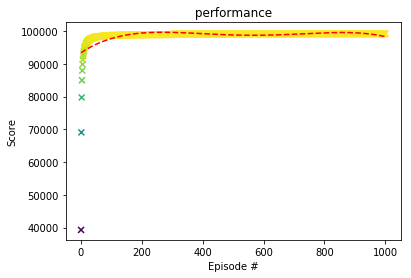

In [23]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance ')
plt.show()

In [24]:
optimal =[]
current_state = reset1()
i=0

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

705

transmission

In [26]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=1
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [27]:
optimal =[]
current_state = reset1()
i=1

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

780

wheel rim

In [26]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=2
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [27]:
optimal =[]
current_state = reset1()
i=2

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

680

coupling

In [28]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=3
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [29]:
optimal =[]
current_state = reset1()
i=3

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

870

motor

In [32]:
scores = []
i=4
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [33]:
optimal =[]
current_state = reset1()
i=4

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

335

Brake

In [34]:
scores = []
i=5
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [35]:
optimal =[]
current_state = reset1()
i=5

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

940

Steering Wheel

In [36]:
scores = []
i=6
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [37]:
optimal =[]
current_state = reset1()
i=6

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

715

Shifting Gears

In [39]:
scores = []
i=7
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
                    
    # Looping for each step
    for j in range(running_time//time_interval):
        
        current_statey = (current_state[i],current_state[i+8])
        # Choose A from S
        action = choose_action(epsilon,current_statey , i)
        # Take action
        obs = step(action , list(current_state),i)
        reward = rewardfun(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        new_statey = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statey][action] += (learning_rate * 
                                        (reward + discount * np.max(Q_table[new_statey])
                                         - Q_table[current_statey][action]))
                                         
                                         
        current_state = new_state 
    
    scores.append(sum(rewards))

In [40]:
optimal =[]
current_state = reset1()
i=7

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step(action,list(current_state),i)
    reward = rewardfun(action,current_state,i)
    current_state = obs
np.unique(optimal)[0]

1105